<a href="https://colab.research.google.com/github/oilportrait/test_colab/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

targetUrl = "https://raw.githubusercontent.com/oilportrait/test_colab/main/fake_bills.csv"

df2 = pd.read_csv(targetUrl, sep=';')


genuine = df2["is_genuine"]
 
encoded_genuine = pd.get_dummies(genuine, prefix='genuine')
df2 = pd.concat([df2, encoded_genuine], axis = 1)
df2 = df2.drop(df2.columns[0], axis=1)
df2.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine_False,genuine_True
0,171.81,104.86,104.95,4.52,2.89,112.83,0,1
1,171.46,103.36,103.66,3.77,2.99,113.09,0,1
2,172.69,104.48,103.50,4.40,2.94,113.16,0,1
3,171.36,103.91,103.94,3.62,3.01,113.51,0,1
4,171.73,104.28,103.46,4.04,3.48,112.54,0,1


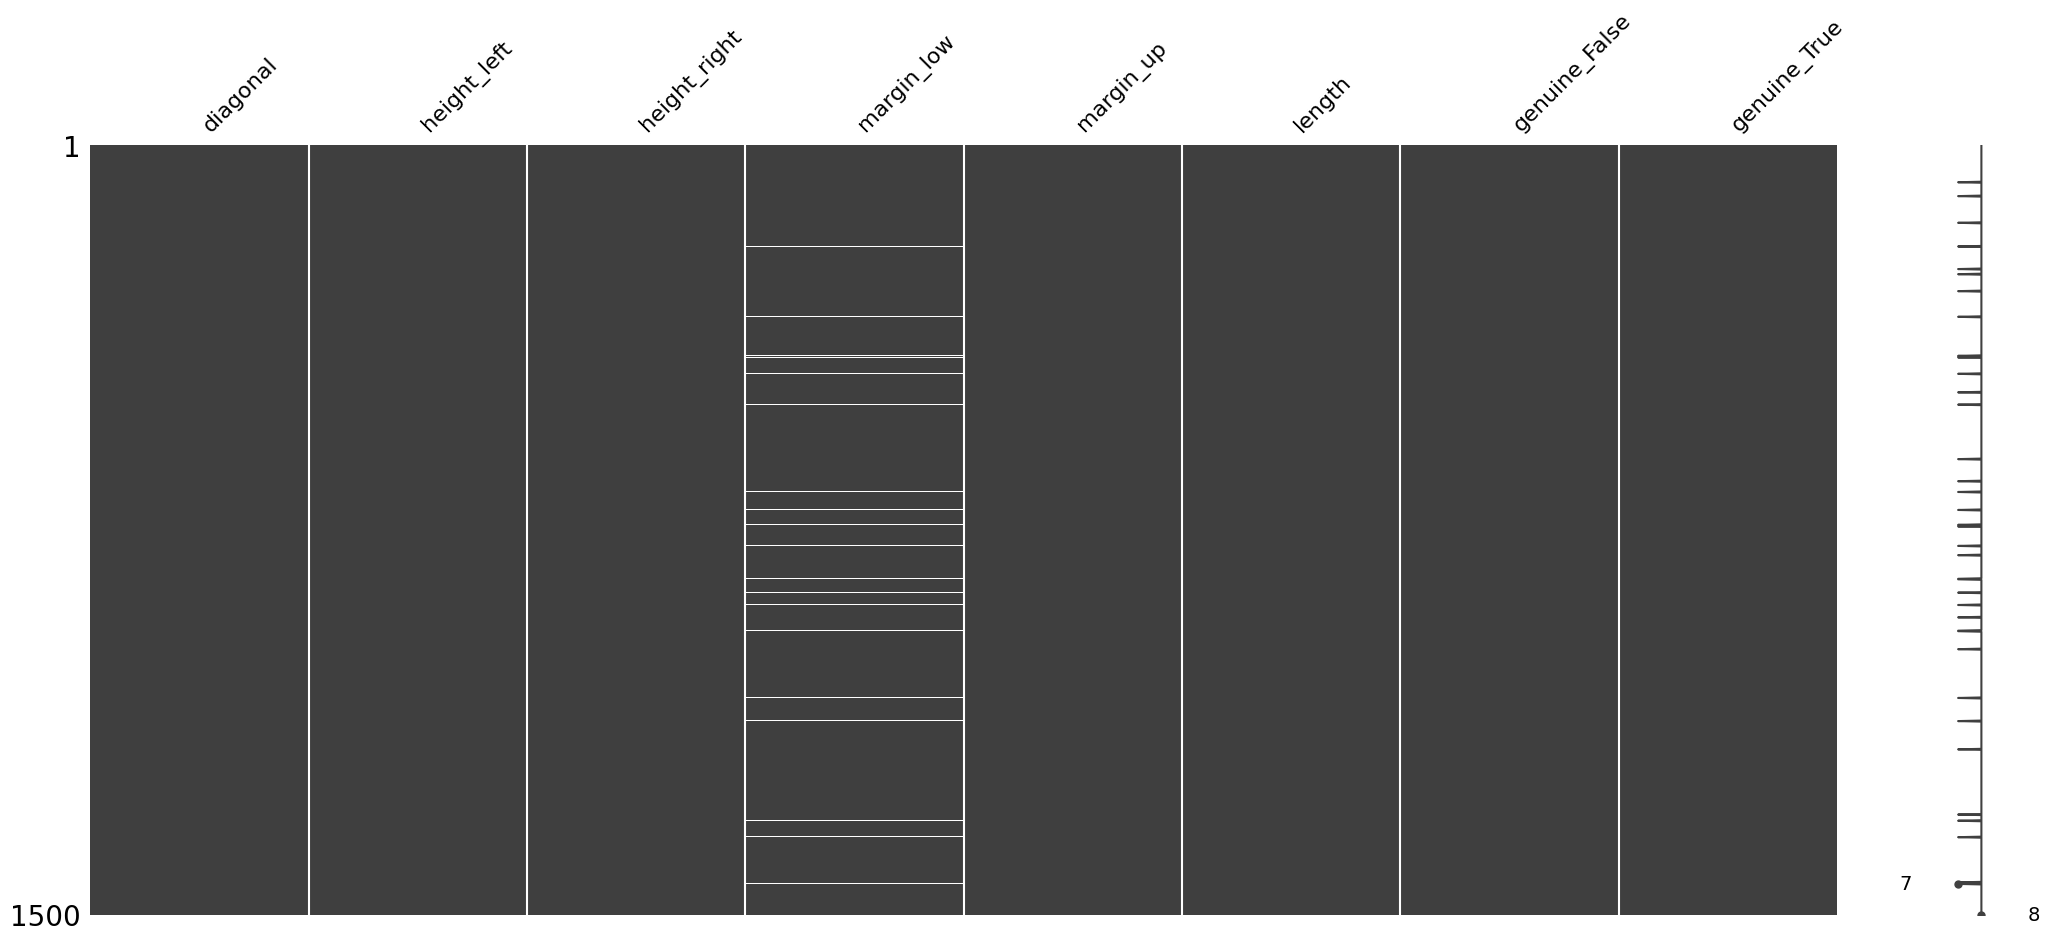

In [2]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df2)
plt.show()

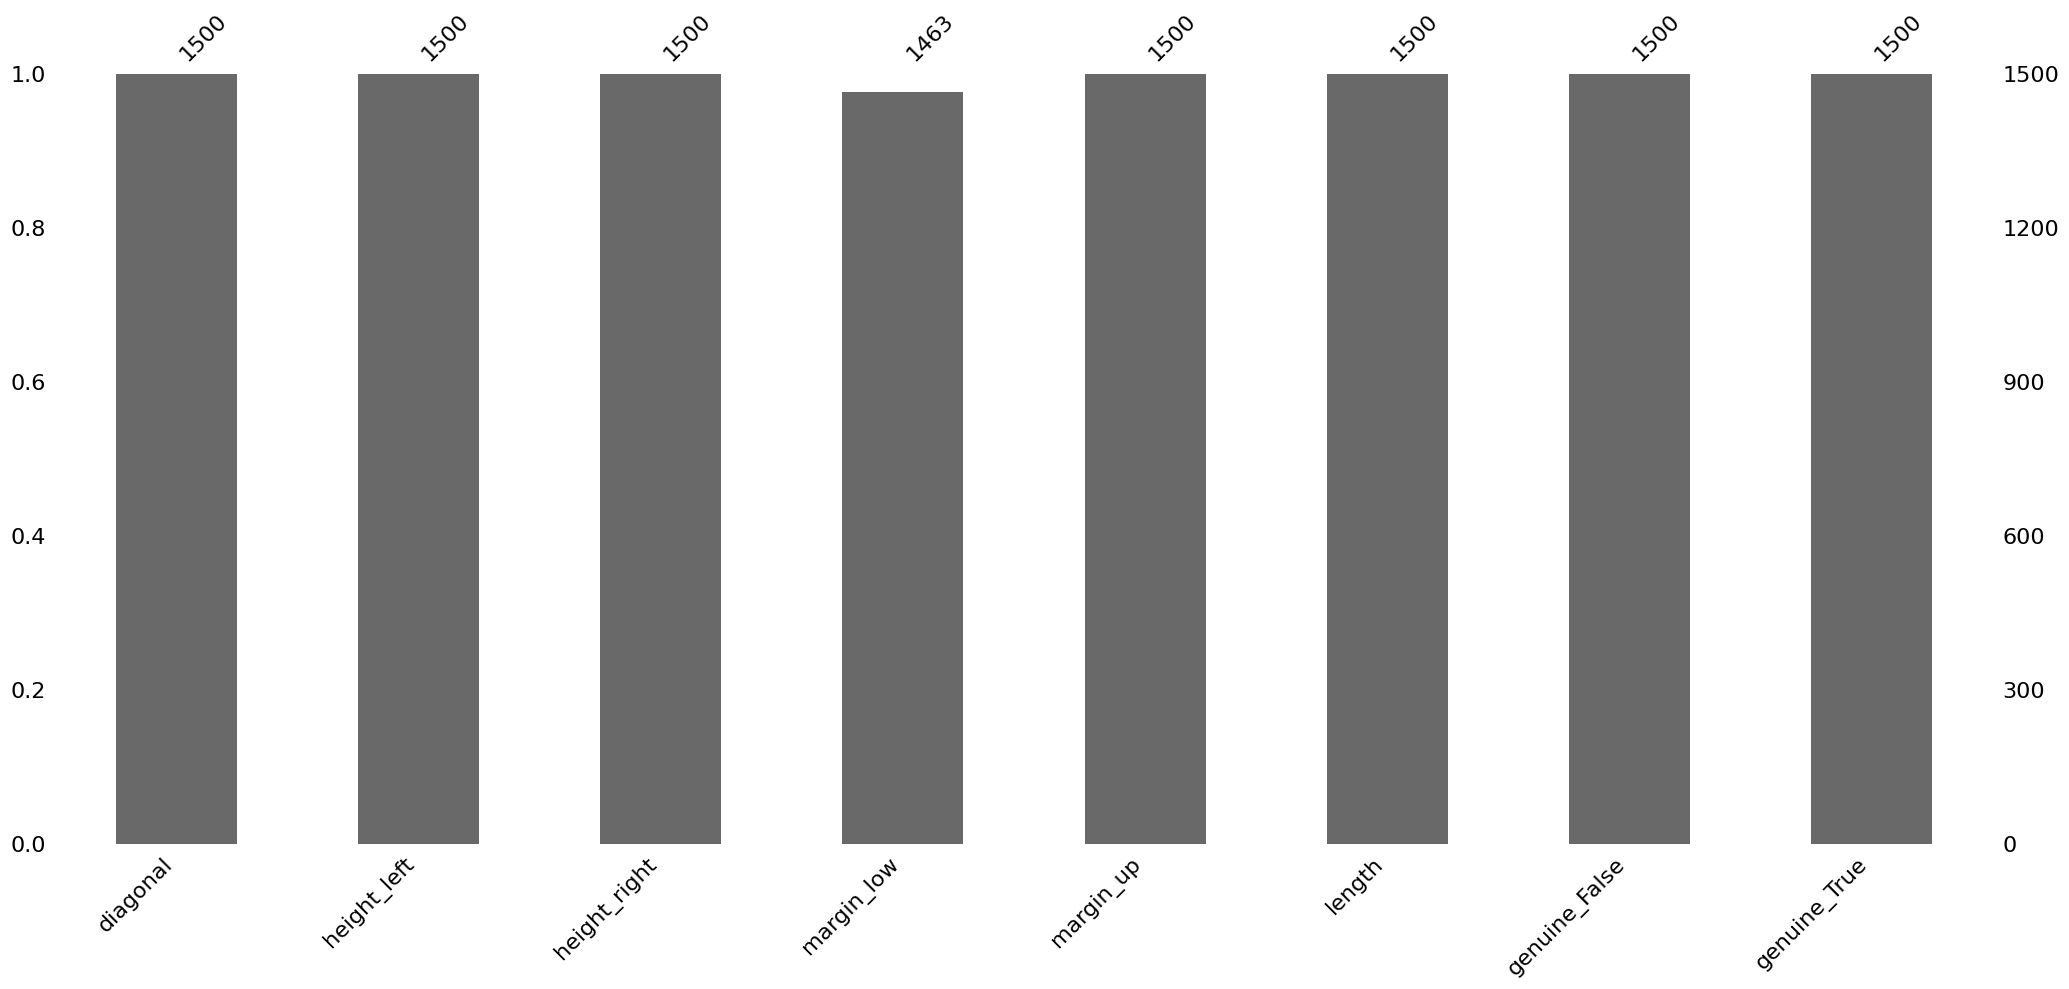

In [3]:
msno.bar(df2)
plt.show()

<Axes: >

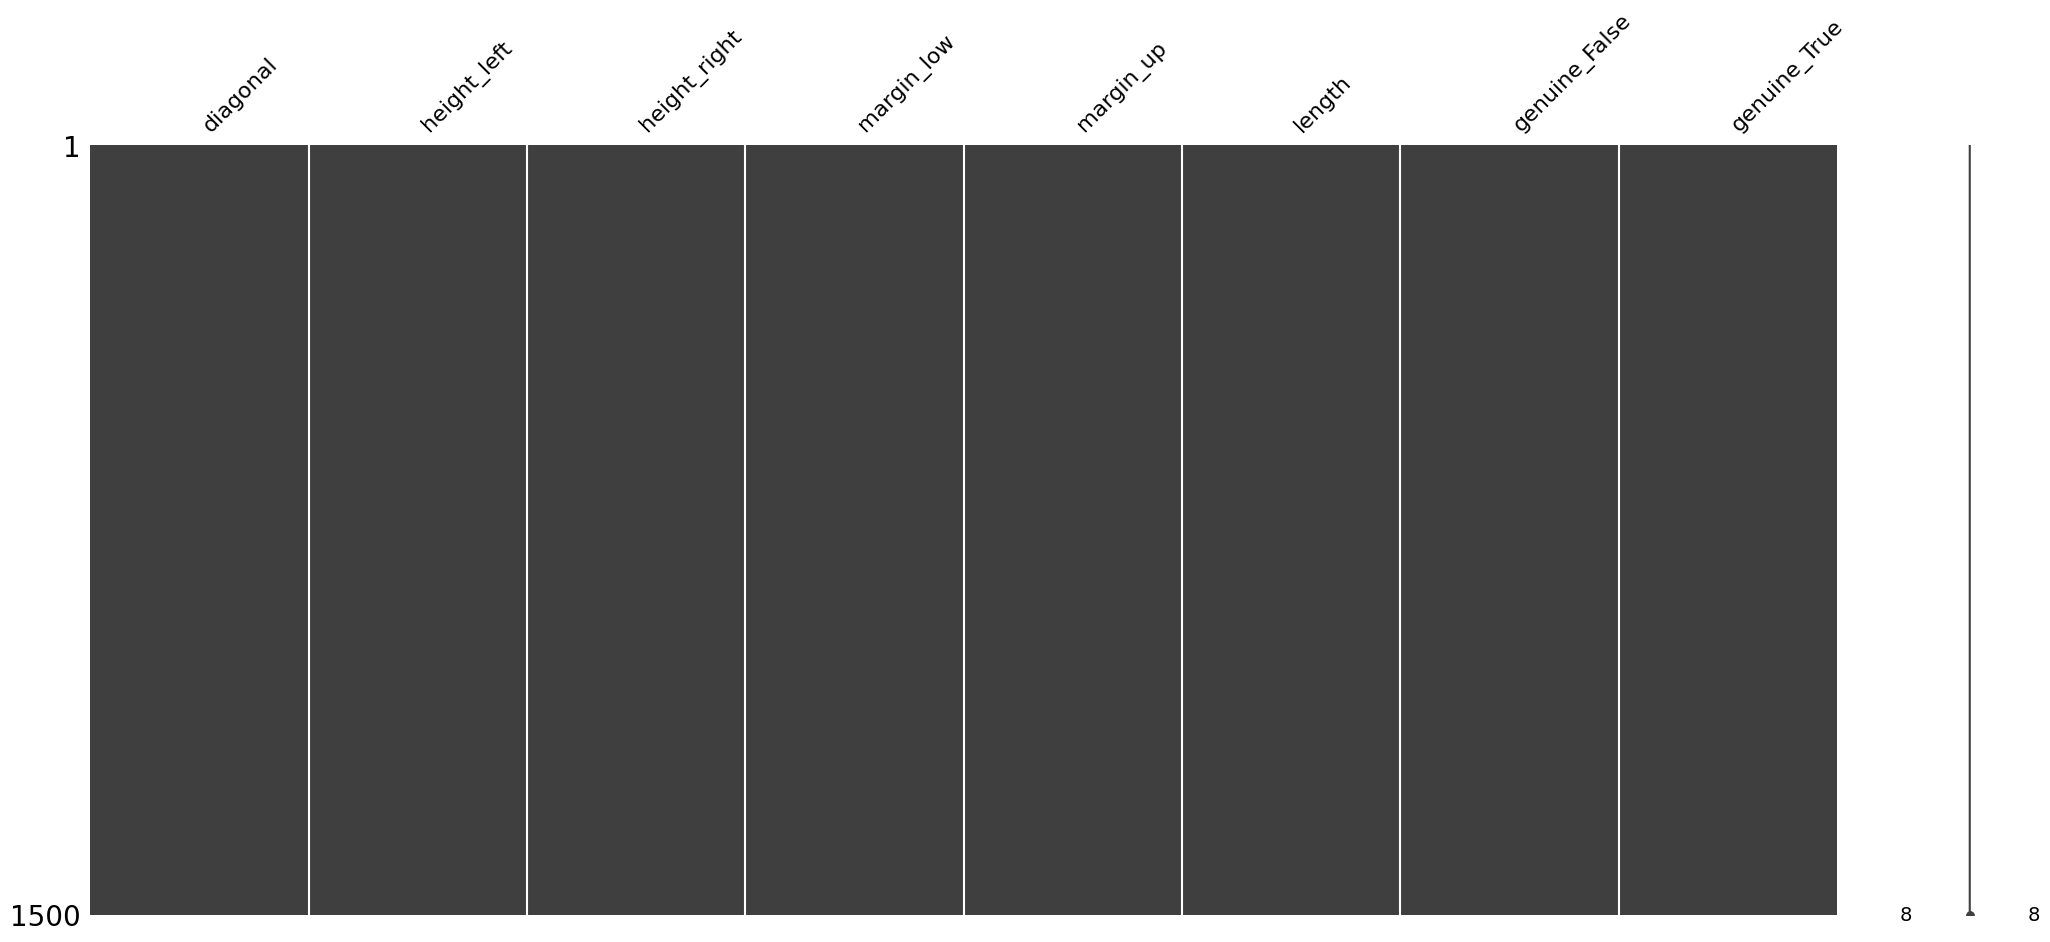

In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df2[["margin_low"]] = imputer.fit_transform(df2[["margin_low"]])
msno.matrix(df2)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df2.iloc[:,0:6], df2.iloc[:,6:8], stratify=df2.iloc[:,6:8], random_state=1)

In [6]:
X_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
1246,171.76,104.14,104.54,5.14,3.41,111.50
612,171.95,103.35,103.76,3.85,3.29,113.07
891,172.16,103.63,103.59,4.25,3.38,113.58
939,171.94,104.64,103.70,4.36,2.98,112.83
484,172.10,104.02,103.88,3.95,3.10,113.39


In [7]:
y_train.head()

,genuine_False,genuine_True
1246,1,0
612,0,1
891,0,1
939,0,1
484,0,1


In [8]:
type(y_test)

pandas.core.frame.DataFrame

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

df_cat = pd.concat([X_train,y_train], axis=1)

df_cat.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine_False,genuine_True
1246,171.76,104.14,104.54,5.14,3.41,111.50,1,0
612,171.95,103.35,103.76,3.85,3.29,113.07,0,1
891,172.16,103.63,103.59,4.25,3.38,113.58,0,1
939,171.94,104.64,103.70,4.36,2.98,112.83,0,1
484,172.10,104.02,103.88,3.95,3.10,113.39,0,1


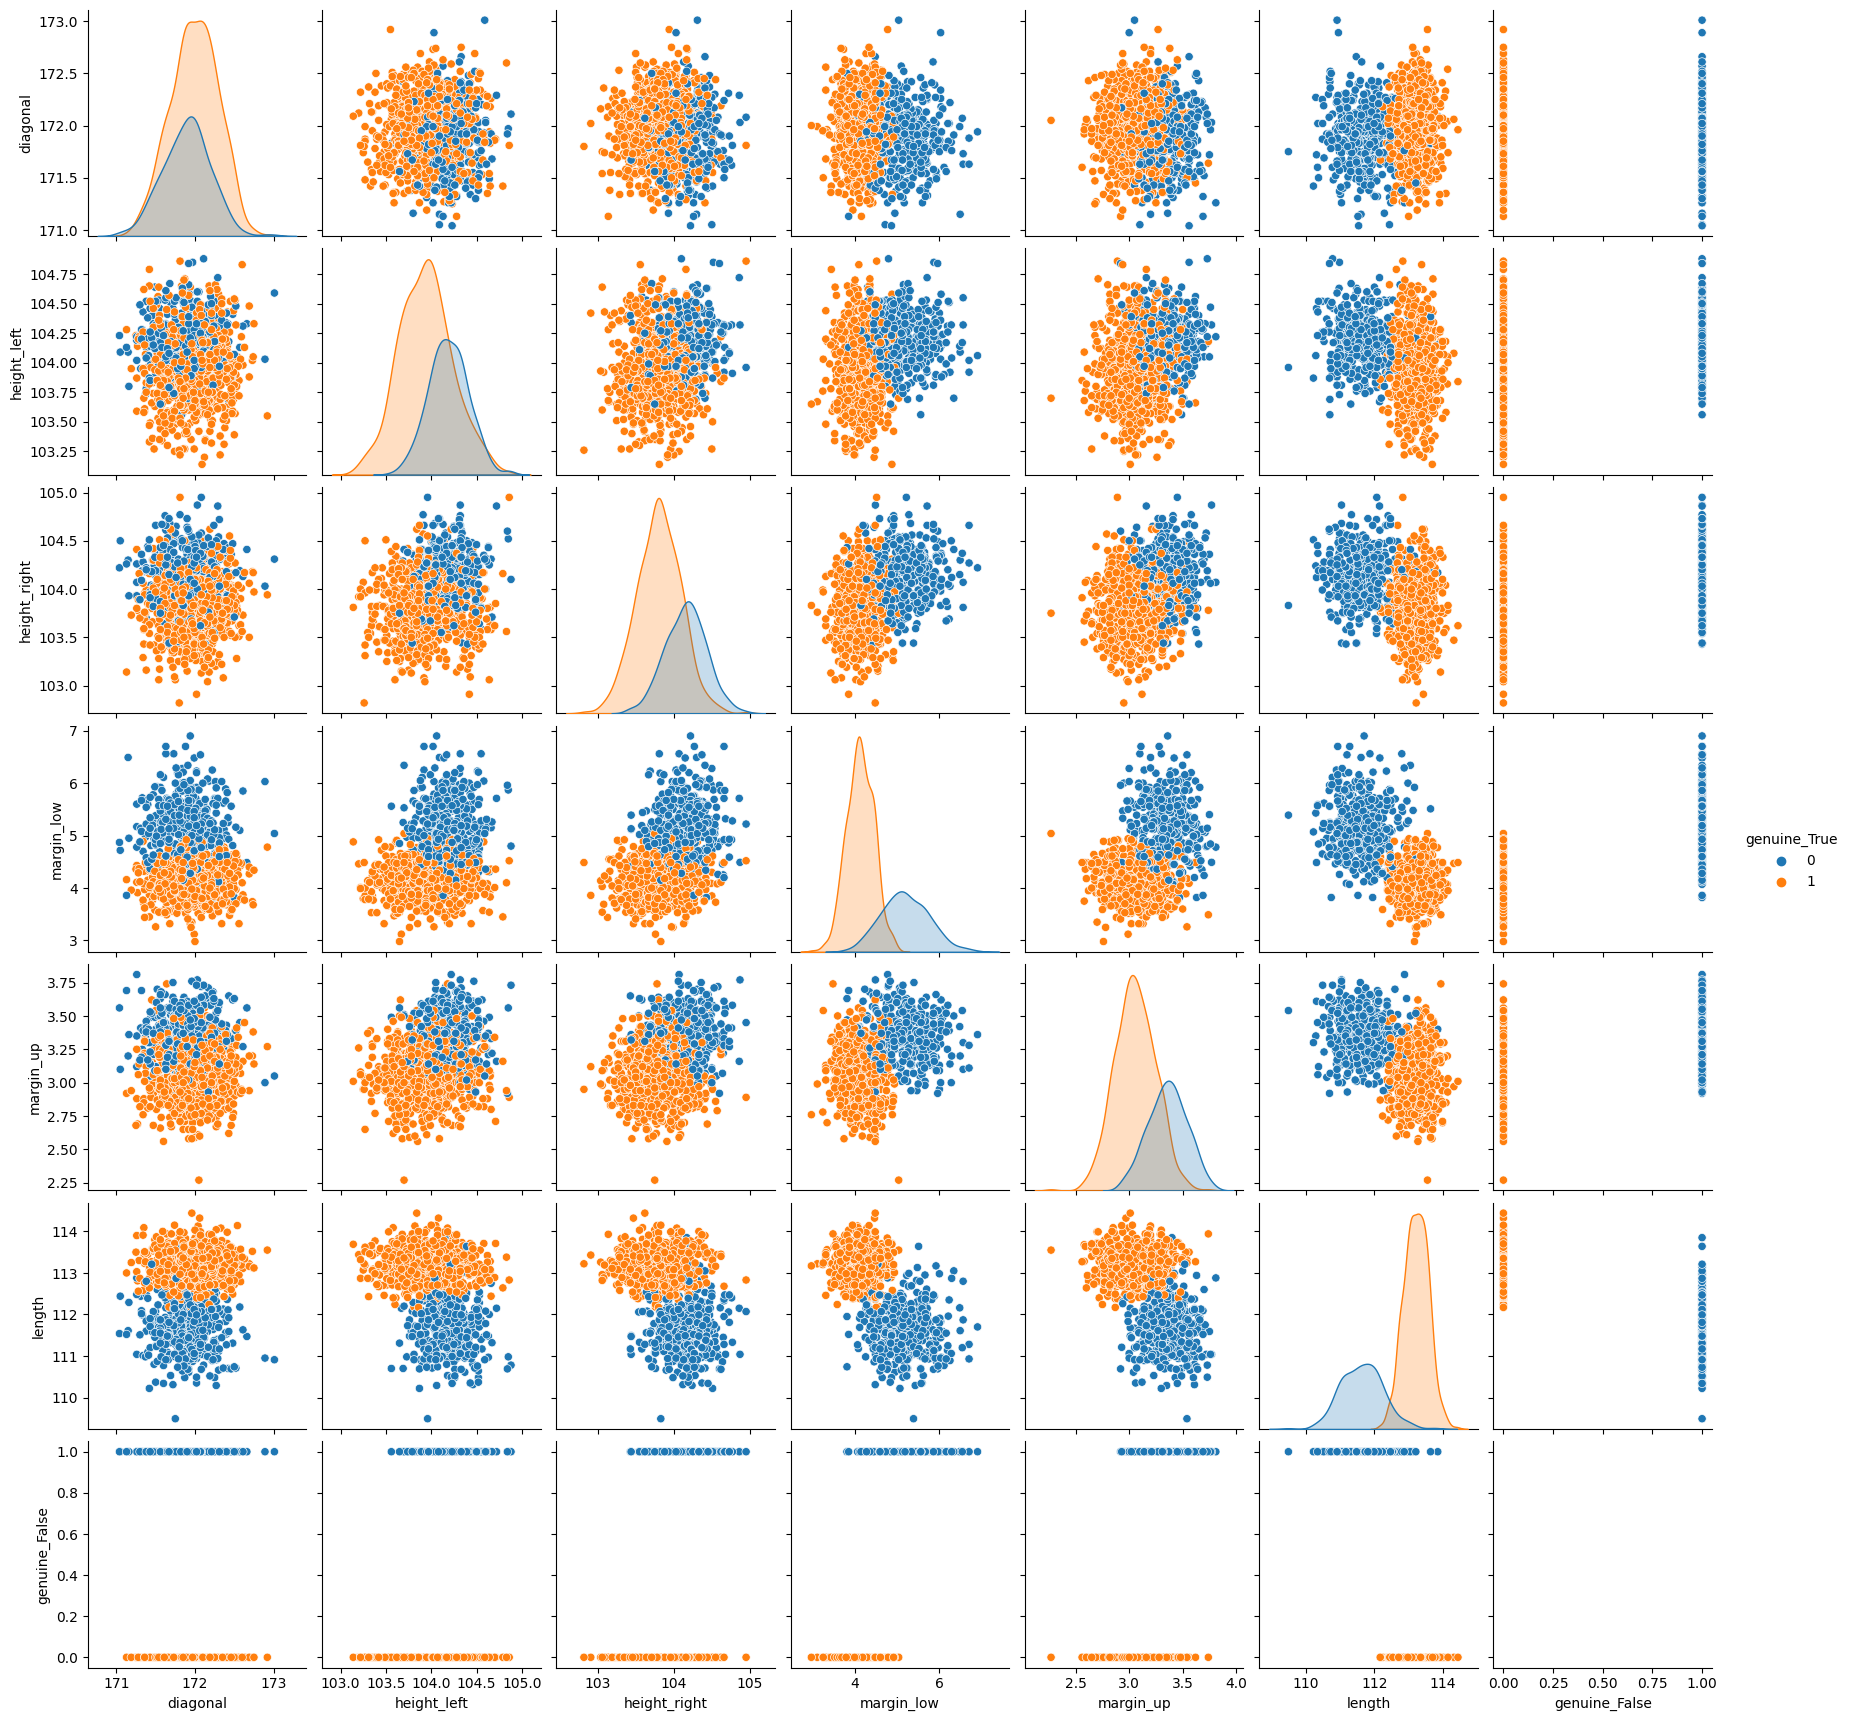

In [10]:
import seaborn as sns
sns.pairplot(df_cat, hue='genuine_True' );
plt.show()

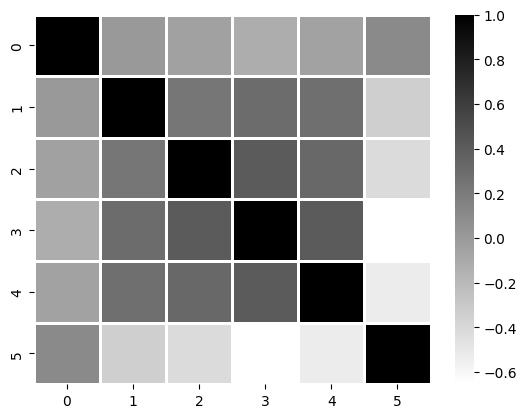

In [11]:
import numpy as np

corr_mat=np.corrcoef(X_train,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='binary')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])
X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
from sklearn.model_selection import GridSearchCV, KFold

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

gs = GridSearchCV(knn, grid_params, cv=kfold)
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score :  0.9902338811630846
Best Test Score :  0.9893333333333333


In [15]:
knn_best = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 10, weights = 'uniform')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [16]:
print('*** Test Accuracy *** \n   {}'.format(knn_best.score(X_test, y_test)))

*** Test Accuracy *** 
   0.992
